# Figures for Greene & Salesky 2023 JFM Submission

Contains code from:

    plot_mean.ipynb
    plot_spec.ipynb
    plot_quadrant.ipynb
    plot_inst_fields.ipynb

## Import packages and set plotting params

In [22]:
%matplotlib inline
# import functions from python directory
import sys
sys.path.append("/home/bgreene/SBL_LES/python/")
import os
import seaborn
import cmocean
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec
from scipy.stats import gmean
from LESnc import load_stats, load_full

In [23]:
# plotting setup
rc("font",weight="normal",size=20,family="serif",serif="Times New Roman")
rc("text",usetex="True")
props=dict(boxstyle="square",facecolor="white",edgecolor="white",alpha=0.0)

## Load data

In [26]:
# directories
# figure save
figdir = "/home/bgreene/SBL_LES/figures/quadrant/"
fdir_save = "/home/bgreene/SBL_LES/figures/LSM/v3/"
# list of simulations to loop over
sims = ["cr0.10_u08", "cr0.25_u08", "cr0.33_u08", "cr0.50_u08",
        "cr1.00_u08", "cr1.50_u08", "cr2.00_u08", "cr2.50_u08"]
# empty list to construct paths and store
dnc_all = [] # directory paths
sall = []    # stats files
Eall = []    # spectrograms
Gall = []    # linear coherence spectra
Rall = []    # amplitude modulation coefficients
quadall = [] # quadrant fractions
condall = [] # conditionally averaged fields
# loop over sims and load stats data
for sim in sims:
    dnc = f"/home/bgreene/simulations/{sim}_192/output/netcdf/"
    dnc_all.append(dnc)
    # load stats file
    s = load_stats(dnc+"average_statistics.nc", display=False)
    sall.append(s)
    # load spectrogram file
    E = xr.load_dataset(dnc+"spectrogram.nc")
    Eall.append(E)
    # load LCS file
    g = xr.load_dataset(dnc+"G2.nc")
    Gall.append(g)
    # load amplitude modulation coefficients
    r = xr.load_dataset(dnc+"AM_coefficients.nc")
    Rall.append(r)
    # load quadrant files
    quad = xr.load_dataset(dnc+"uw_tw_quadrant.nc")
    quadall.append(quad)
    # load conditional average files
    cond = xr.load_dataset(dnc+"cond_avg.nc")
    condall.append(cond)

# define colormap based on number of simulations
nsim = len(sims)
# seaborn palette
cmap = seaborn.cubehelix_palette(n_colors=nsim, start=0, rot=-1, gamma=1, hue=1, 
                                 light=0.8, dark=0.1, reverse=True)
cmap2 = cmocean.cm.balance
cmap3 = seaborn.color_palette("cubehelix_r", as_cmap=True)
cmap3_r = seaborn.color_palette("cubehelix", as_cmap=True)
# custom linestyles
dash = [(1,()),
        (0, (5, 1)),
        (0, (1, 1)),
        (0, (3, 1, 1, 1)),
        (0, (3, 1, 1, 1, 1, 1)),
        (0, (3, 1, 3, 1, 1, 1, 1, 1)),
        (0, (3, 1, 1, 1)),
        (0, (3, 1)),
        (1, ())]

Reading file: /home/bgreene/simulations/cr0.10_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.25_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.33_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.50_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr1.00_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr1.50_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.00_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.50_u08_192/output/netcdf/average_statistics.nc


## Figure 1: Ozmidov scale

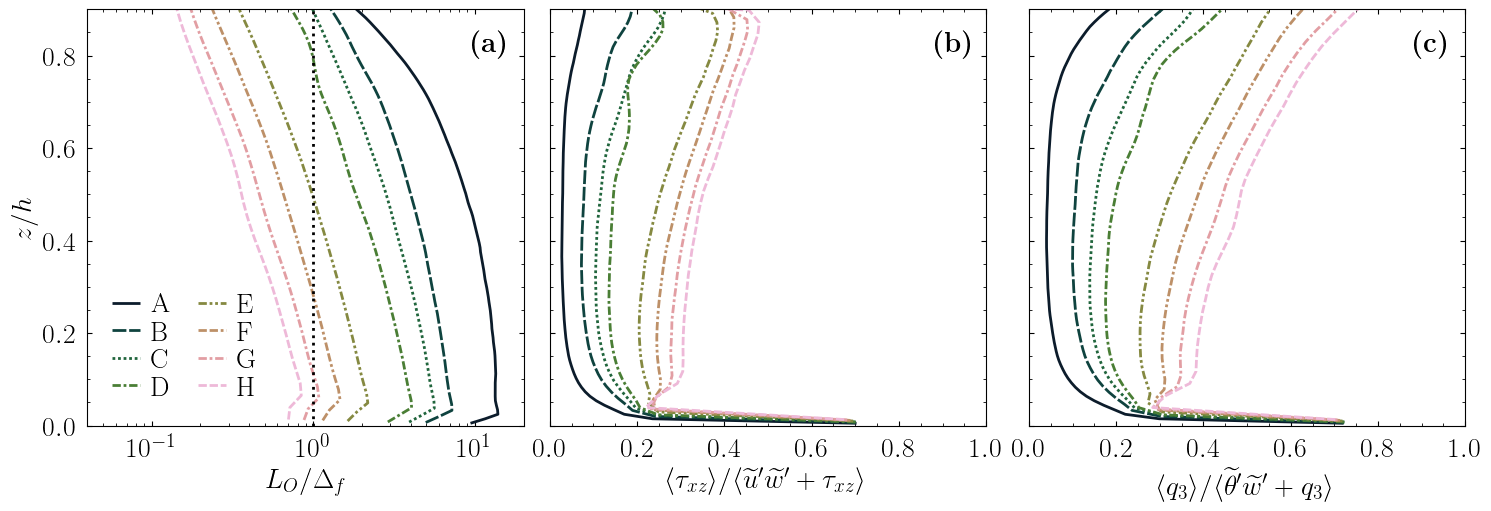

In [4]:
fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14.8, 5), constrained_layout=True)
# loop over sims
for ii, s in enumerate(sall):
    # Lo
    ax1[0].plot(s.Lo/s.delta, s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # SGS ratios
    # u'w'
    txz = s.uw_cov_tot - s.uw_cov_res
    ax1[1].plot(txz/s.uw_cov_tot, s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # theta'w'
    q3 = s.tw_cov_tot - s.tw_cov_res
    ax1[2].plot(q3/s.tw_cov_tot, s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
# vertical line in panel a for filter width
# ax1[0].axvline(s.delta, c="k", lw=2, ls=":", label="$\\Delta_f$")
ax1[0].axvline(1, c="k", lw=2, ls=":")
# legend
ax1[0].legend(frameon=False, labelspacing=0.10, ncol=2, columnspacing=1,
              handletextpad=0.4, handlelength=1, loc="lower left")
# axis limits
ax1[0].set_ylim([0, 0.9])
ax1[0].set_xlim([4e-2, 2e1])
ax1[0].set_xscale("log")
ax1[1].set_xlim([0, 1])
ax1[2].set_xlim([0, 1])
# axis ticks
ax1[0].yaxis.set_major_locator(MultipleLocator(0.2))
ax1[0].yaxis.set_minor_locator(MultipleLocator(0.05))
# ax1[0].xaxis.set_major_locator(MultipleLocator(5))
# ax1[0].xaxis.set_minor_locator(MultipleLocator(1))
ax1[1].xaxis.set_major_locator(MultipleLocator(0.2))
ax1[1].xaxis.set_minor_locator(MultipleLocator(0.05))
ax1[2].xaxis.set_major_locator(MultipleLocator(0.2))
ax1[2].xaxis.set_minor_locator(MultipleLocator(0.05))
# axis labels
ax1[0].set_ylabel("$z/h$")
ax1[0].set_xlabel("$L_O / \\Delta_f$")
ax1[1].set_xlabel("$\\langle \\tau_{xz} \\rangle / \\langle \\widetilde{u}'\\widetilde{w}' + \\tau_{xz} \\rangle$")
ax1[2].set_xlabel("$\\langle q_3 \\rangle / \\langle \\widetilde{\\theta}'\\widetilde{w}' + q_3 \\rangle$")
# tick lines inside plot
for iax, lab in zip(ax1, list("abc")):
    iax.tick_params(which="both", direction="in", top=True, right=True, pad=8)
    iax.text(0.88,0.90,f"$\\textbf{{({lab})}}$",fontsize=20,
             transform=iax.transAxes)
# save
# fig1.savefig(f"{fdir_save}Fig01.pdf", format="pdf")

## Figure 2: Mean profiles

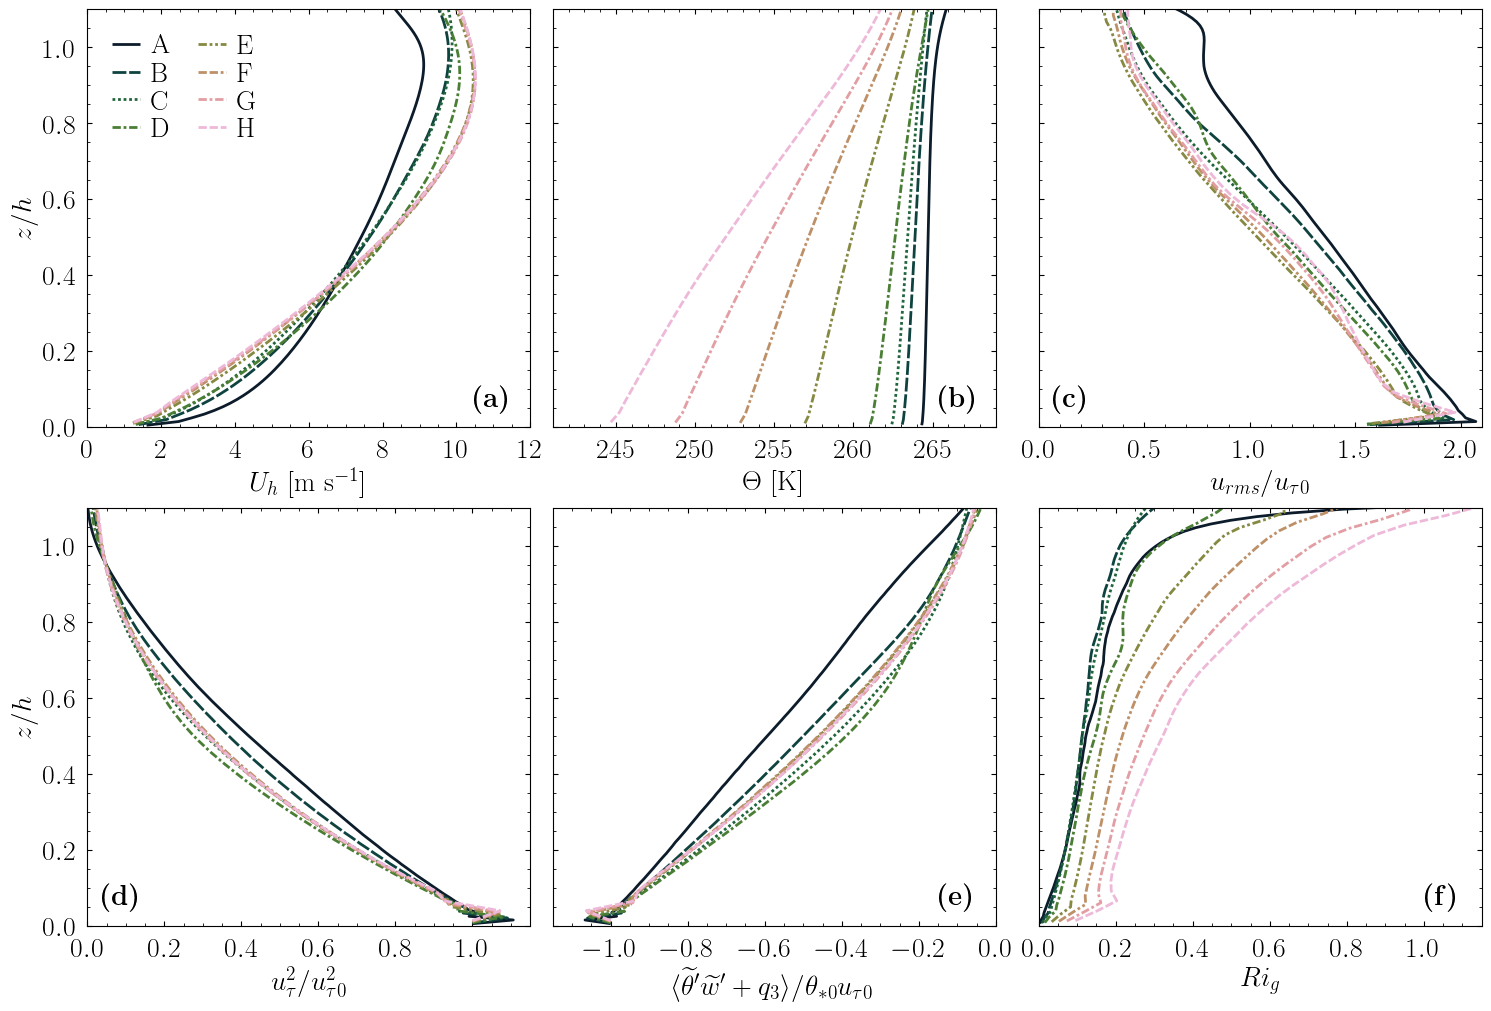

In [5]:
# (a)wspd; (b) <\Theta>; (c) urms;
# (d) ustar^2; (e) <\theta'w'>; (f) Ri_g
fig2, ax2 = plt.subplots(nrows=2, ncols=3, sharey=True, 
                         figsize=(14.8, 10), constrained_layout=True)
for i, s in enumerate(sall):
    # now plot
    # row 1
    # (a) Uh
    ax2[0,0].plot(s.uh, s.z/s.h, ls=dash[i], c=cmap[i], lw=2, label=s.lab)
    # (b) <\theta>
    ax2[0,1].plot(s.theta_mean, s.z/s.h, ls=dash[i], c=cmap[i], lw=2, label=s.lab)
    # (c) rms velocity
    ax2[0,2].plot(np.sqrt(s.e)/s.ustar0, s.z/s.h, ls=dash[i], c=cmap[i], lw=2, label=s.lab)
    # row 2
    # (d) ustar^2
    ax2[1,0].plot(s.ustar2/s.ustar0/s.ustar0, s.z/s.h, ls=dash[i], c=cmap[i], lw=2)
    # (e) <\theta'w'>
    ax2[1,1].plot(s.tw_cov_tot/s.ustar0/s.tstar0, s.z/s.h, ls=dash[i], c=cmap[i], lw=2)
    # (f) Rig
    ax2[1,2].plot(s.Rig, s.z/s.h, ls=dash[i], c=cmap[i], lw=2)
# clean up
# (a)
ax2[0,0].set_xlabel("$U_h$ [m s$^{-1}$]")
ax2[0,0].set_ylabel("$z/h$")
ax2[0,0].set_xlim([0, 12.])
ax2[0,0].xaxis.set_major_locator(MultipleLocator(2))
ax2[0,0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax2[0,0].set_ylim([0, 1.1])
ax2[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax2[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
ax2[0,0].text(0.87,0.05,r'\textbf{(a)}',fontsize=20,bbox=props, 
              transform=ax2[0,0].transAxes)
ax2[0,0].legend(frameon=False, labelspacing=0.10, ncol=2, columnspacing=1,
                handletextpad=0.4, handlelength=1, loc="upper left")
# (b)
ax2[0,1].set_xlabel("$\\Theta$ [K]")
ax2[0,1].set_xlim([241, 269.])
ax2[0,1].xaxis.set_major_locator(MultipleLocator(5))
ax2[0,1].xaxis.set_minor_locator(MultipleLocator(1))
ax2[0,1].text(0.87,0.05,r'\textbf{(b)}',fontsize=20,bbox=props, 
              transform=ax2[0,1].transAxes)
# (c)
ax2[0,2].set_xlabel("$u_{rms} / u_{\\tau 0}$")
ax2[0,2].set_xlim([0, 2.1])
ax2[0,2].xaxis.set_major_locator(MultipleLocator(0.5))
ax2[0,2].xaxis.set_minor_locator(MultipleLocator(0.1))
ax2[0,2].text(0.03,0.05,r'\textbf{(c)}',fontsize=20,bbox=props, 
              transform=ax2[0,2].transAxes)
# (d)
ax2[1,0].set_xlabel("$u_{\\tau}^2 / u_{\\tau 0}^2$")
ax2[1,0].set_ylabel("$z/h$")
ax2[1,0].set_xlim([0, 1.15])
ax2[1,0].xaxis.set_major_locator(MultipleLocator(0.2))
ax2[1,0].xaxis.set_minor_locator(MultipleLocator(0.05))
ax2[1,0].text(0.03,0.05,r'\textbf{(d)}',fontsize=20,bbox=props, 
              transform=ax2[1,0].transAxes)
# (e)
ax2[1,1].set_xlabel("$\\langle \\widetilde{\\theta}'\\widetilde{w}' + q_3 \\rangle / \\theta_{*0} u_{\\tau 0}$")
ax2[1,1].set_xlim([-1.15, 0])
ax2[1,1].xaxis.set_major_locator(MultipleLocator(0.2))
ax2[1,1].xaxis.set_minor_locator(MultipleLocator(0.05))
ax2[1,1].text(0.87,0.05,r'\textbf{(e)}',fontsize=20,bbox=props, 
              transform=ax2[1,1].transAxes)
# (f)
ax2[1,2].set_xlabel("$Ri_g$")
ax2[1,2].set_xlim([0, 1.15])
ax2[1,2].xaxis.set_major_locator(MultipleLocator(0.2))
ax2[1,2].xaxis.set_minor_locator(MultipleLocator(0.05))
ax2[1,2].text(0.87,0.05,r'\textbf{(f)}',fontsize=20,bbox=props, 
              transform=ax2[1,2].transAxes)
# tick lines inside plot
for iax in ax2.flatten():
    iax.tick_params(which="both", direction="in", top=True, right=True, pad=8)
# save
# fig2.savefig(f"{fdir_save}Fig02.pdf", format="pdf")

## Figure 3: Instantaneous fields

Row 1: $u'(x,y;z/h=0.1)$

Row 2: $\theta'(x,y;z/h=0.1)$

Row 3: $u'(x,z;y=L_y/2)$

Col 1: Case A

Col 2: Case E

In [6]:
# load these cases
dd1, s1 = load_full(dnc_all[0], 1260000, 1260000, 1000, 0.02, True, True)
dd2, s2 = load_full(dnc_all[4], 1260000, 1260000, 1000, 0.02, True, True)
# grab coordinates
xh1 = dd1.x/s1.h
yh1 = dd1.y/s1.h
zh1 = dd1.z/s1.h
xh2 = dd2.x/s2.h
yh2 = dd2.y/s2.h
zh2 = dd2.z/s2.h
# calculate parameters to be plotted
# u'
up1 = (dd1.u_rot - dd1.u_rot.mean(dim=("x","y"))).isel(time=0)/s1.ustar0
up2 = (dd2.u_rot - dd2.u_rot.mean(dim=("x","y"))).isel(time=0)/s2.ustar0
# theta'
Tp1 = (dd1.theta - dd1.theta.mean(dim=("x","y"))).isel(time=0)/s1.tstar0
Tp2 = (dd2.theta - dd2.theta.mean(dim=("x","y"))).isel(time=0)/s2.tstar0
# w'
wp1 = (dd1.w - dd1.w.mean(dim=("x","y"))).isel(time=0)/s1.ustar0
wp2 = (dd2.w - dd2.w.mean(dim=("x","y"))).isel(time=0)/s2.ustar0

Loading files...
Reading file: /home/bgreene/simulations/cr0.10_u08_192/output/netcdf/average_statistics.nc
Loading files...
Reading file: /home/bgreene/simulations/cr1.00_u08_192/output/netcdf/average_statistics.nc


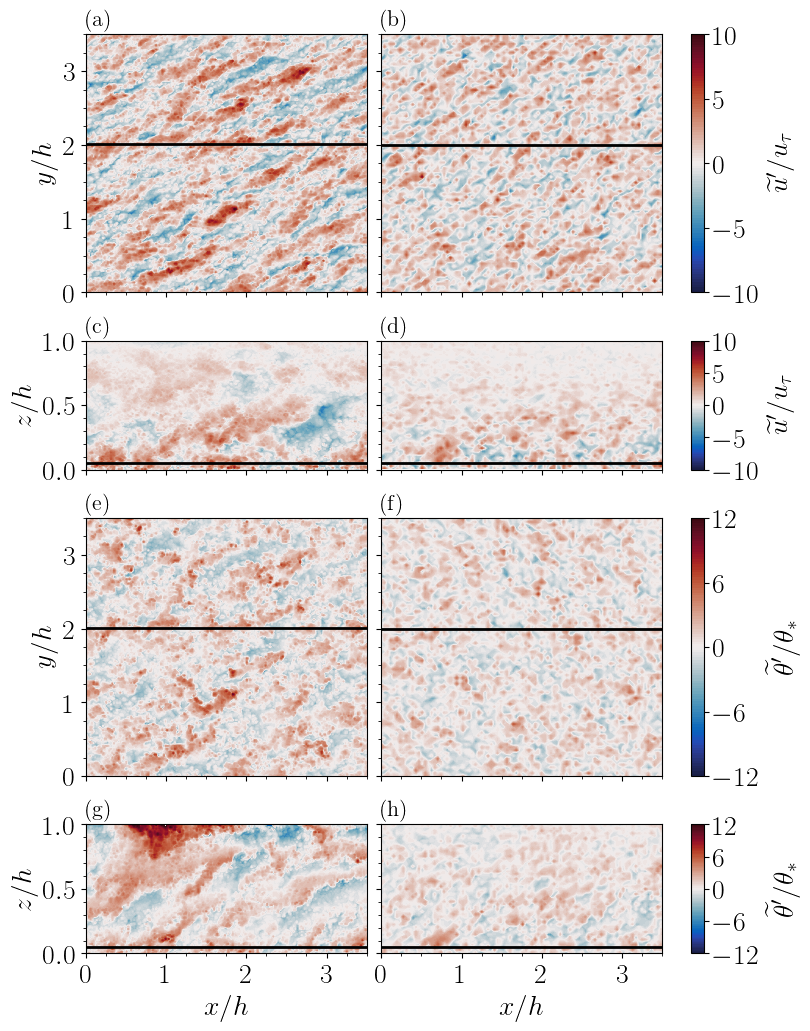

In [7]:
# calculate indices for plotting
# z/h = 0.1
jz1 = abs(zh1 - 0.05).argmin()
jz2 = abs(zh2 - 0.05).argmin()
# y/h = 2
jy1 = abs(yh1 - 2.0).argmin()
jy2 = abs(yh2 - 2.0).argmin()
# initialize figure
fig = plt.figure(constrained_layout=True, figsize=(8, 10.2))
# add gridspec
gs = GridSpec(6, 2, figure=fig)
# define axes
ax1 = fig.add_subplot(gs[:2, 0]) # top left
ax2 = fig.add_subplot(gs[:2, 1], sharex=ax1, sharey=ax1) # top right
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1) # row 2 left
ax4 = fig.add_subplot(gs[2, 1], sharex=ax1, sharey=ax3) # row 2 right
ax5 = fig.add_subplot(gs[3:5, 0], sharex=ax1, sharey=ax1) # row 3 left
ax6 = fig.add_subplot(gs[3:5, 1], sharex=ax1, sharey=ax1) # row 3 right
ax7 = fig.add_subplot(gs[-1, 0], sharex=ax1, sharey=ax3) # bottom left
ax8 = fig.add_subplot(gs[-1, 1], sharex=ax1, sharey=ax3) # bottom right
# define contour levels
levelu = np.linspace(-10, 10, 101)
levelT = np.linspace(-12, 12, 101)
# plot
# row 1: u', x-y
cfax1 = ax1.contourf(xh1, yh1, up1.isel(z=jz1).T, cmap=cmap2, levels=levelu)
cfax2 = ax2.contourf(xh2, yh2, up2.isel(z=jz2).T, cmap=cmap2, levels=levelu)
# row 2: u', x-z
cfax3 = ax3.contourf(xh1, zh1, up1.isel(y=jy1).T, cmap=cmap2, levels=levelu)
cfax4 = ax4.contourf(xh2, zh2, up2.isel(y=jy2).T, cmap=cmap2, levels=levelu)
# row 3: T', x-y
cfax5 = ax5.contourf(xh1, yh1, Tp1.isel(z=jz1).T, cmap=cmap2, levels=levelT)
cfax6 = ax6.contourf(xh2, yh2, Tp2.isel(z=jz2).T, cmap=cmap2, levels=levelT)
# row 3: T', x-z
cfax7 = ax7.contourf(xh1, zh1, Tp1.isel(y=jy1).T, cmap=cmap2, levels=levelT)
cfax8 = ax8.contourf(xh2, zh2, Tp2.isel(y=jy2).T, cmap=cmap2, levels=levelT)
# velocity vectors overlaid row 3
# ax5.quiver(xh1[::10], zh1[::10], up1.isel(y=jy1,x=range(0,192,10),z=range(0,192,10)), wp1.isel(y=jy1,x=range(0,192,10),z=range(0,192,10)))
# ax6.quiver(xh2[::10], zh2[::10], up2.isel(y=jy2,x=range(0,192,10),z=range(0,192,10)), wp2.isel(y=jy2,x=range(0,192,10),z=range(0,192,10)))
# horizontal lines showing cross sections
ax1.axhline(yh1[jy1], c="k", lw=2)
ax2.axhline(yh2[jy2], c="k", lw=2)
ax3.axhline(zh1[jz1], c="k", lw=2)
ax4.axhline(zh2[jz2], c="k", lw=2)
ax5.axhline(yh1[jy1], c="k", lw=2)
ax6.axhline(yh2[jy2], c="k", lw=2)
ax7.axhline(zh1[jz1], c="k", lw=2)
ax8.axhline(zh2[jz2], c="k", lw=2)
# colorbars
cb12 = fig.colorbar(cfax1, ax=[ax1, ax2], location="right", ticks=MultipleLocator(5))
cb34 = fig.colorbar(cfax3, ax=[ax3, ax4], location="right", ticks=MultipleLocator(5), aspect=10)
cb56 = fig.colorbar(cfax5, ax=[ax5, ax6], location="right", ticks=MultipleLocator(6))
cb78 = fig.colorbar(cfax7, ax=[ax7, ax8], location="right", ticks=MultipleLocator(6), aspect=10)
# colorbar labels
cb12.ax.set_ylabel("$\\widetilde{u}'/u_{\\tau}$")
cb34.ax.set_ylabel("$\\widetilde{u}'/u_{\\tau}$")
cb56.ax.set_ylabel("$\\widetilde{\\theta}'/\\theta_{*}$")
cb78.ax.set_ylabel("$\\widetilde{\\theta}'/\\theta_{*}$")
# axis limits
ax1.set_xlim([0, 3.5])
ax1.set_ylim([0, 3.5])
ax3.set_ylim([0, 1])
# remove axis tick labels
ax1.tick_params(labelbottom=False, labelleft=True)
ax2.tick_params(labelbottom=False, labelleft=False)
ax3.tick_params(labelbottom=False, labelleft=True)
ax4.tick_params(labelbottom=False, labelleft=False)
ax5.tick_params(labelbottom=False, labelleft=True)
ax6.tick_params(labelbottom=False, labelleft=False)
ax7.tick_params(labelbottom=True, labelleft=True)
ax8.tick_params(labelbottom=True, labelleft=False)
# format axis ticks
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.25))
ax3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.yaxis.set_minor_locator(MultipleLocator(0.1))
ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.xaxis.set_minor_locator(MultipleLocator(0.25))
# label axes
ax1.set_ylabel("$y/h$")
ax3.set_ylabel("$z/h$")
ax5.set_ylabel("$y/h$")
ax7.set_ylabel("$z/h$")
ax7.set_xlabel("$x/h$")
ax8.set_xlabel("$x/h$")
# make vector graphics nice
# cb12.solids.set_edgecolor("face")
# cb34.solids.set_edgecolor("face")
# cb56.solids.set_edgecolor("face")
# for cax in [cfax1, cfax2, cfax3, cfax4, cfax5, cfax6]:
#     for c in cax.collections:
#         c.set_edgecolor("face")
# label subpanels in top left title space
for iax, lab in zip(fig.axes, list("abcdefgh")):
    iax.set_title(f"({lab})", fontsize=16, loc="left")
# save figure
fsave = f"{figdir}Fig03.png"
# fig.savefig(fsave, format="png", dpi=600)

## Figure 4: Spectrograms

$\phi_{uu}$, $\phi_{ww}$, $\phi_{\theta \theta}$, $\phi_{uw}$, $\phi_{\theta w}$

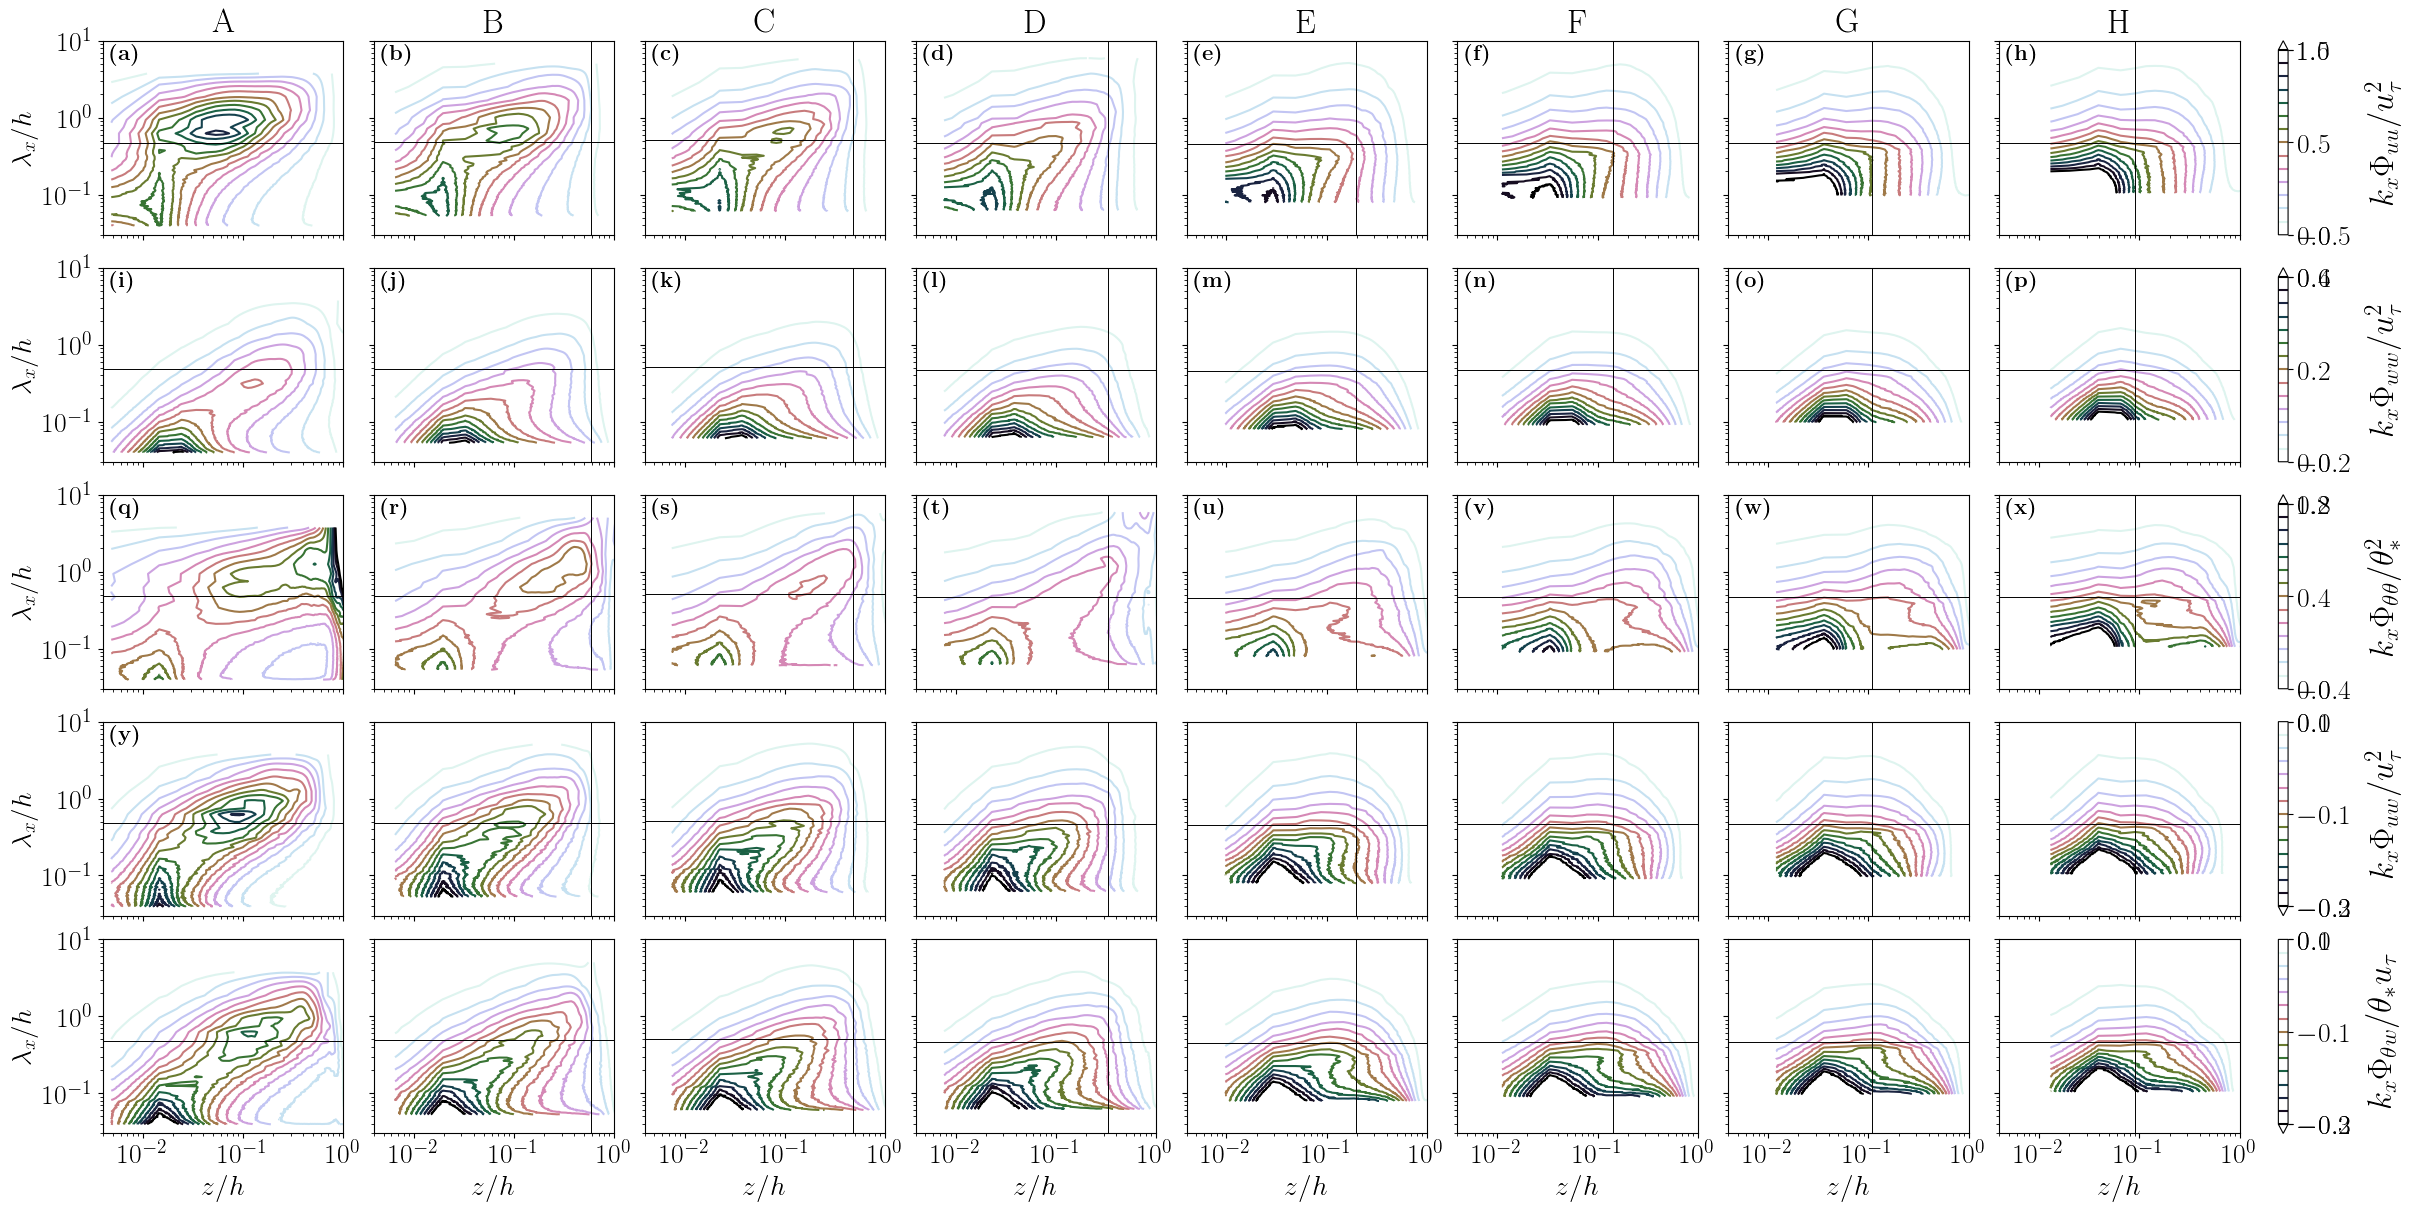

In [12]:
# plot all sims, 1 per column
fig1, ax1 = plt.subplots(nrows=5, ncols=nsim, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(3*nsim, 12))
# plotting parameters
nlevel = 15
# loop over sims
for ii, (s, E) in enumerate(zip(sall, Eall)):
    # row 1
    cax1u = ax1[0,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                              E.freq_x*E.uu/s.ustar0/s.ustar0,
                              levels=np.linspace(0.0, 1.0, nlevel), extend="max",
                              cmap=cmap3)
    # row 2
    cax1w = ax1[1,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                              E.freq_x*E.ww/s.ustar0/s.ustar0,
                              levels=np.linspace(0.0, 0.4, nlevel), extend="max",
                              cmap=cmap3)
    # row 3
    cax1t = ax1[2,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                              E.freq_x*E.tt/s.tstar0/s.tstar0,
                              levels=np.linspace(0.0, 0.8, nlevel), extend="max",
                              cmap=cmap3)
    # row 4
    cax1uw = ax1[3,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                               E.freq_x*E.uw/s.ustar0/s.ustar0,
                               levels=np.linspace(-0.2, 0.0, nlevel), extend="min",
                               cmap=cmap3_r)
    # row 5
    cax1tw = ax1[4,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                               E.freq_x*E.tw/s.tstar0/s.ustar0,
                               levels=np.linspace(-0.2, 0.0, nlevel), extend="min",
                               cmap=cmap3_r)
    # horizontal line for cutoff wavelength zj/2
    [iax.axhline(s.zj/2/s.h, color="k", lw=0.7) for iax in ax1[:,ii]]
    # vertical line for LLJ height zj
    [iax.axvline(s.L/s.h, color="k", lw=0.7) for iax in ax1[:,ii]]
    # title each column for stability
    ax1[0,ii].set_title(s.lab)
# colorbars
cb1u = fig1.colorbar(cax1u, ax=ax1[0,:], location="right", 
                     ticks=MultipleLocator(0.5), pad=0.01)
cb1w = fig1.colorbar(cax1w, ax=ax1[1,:], location="right", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb1t = fig1.colorbar(cax1t, ax=ax1[2,:], location="right", 
                     ticks=MultipleLocator(0.4), pad=0.01)
cb1uw = fig1.colorbar(cax1uw, ax=ax1[3,:], location="right", 
                      ticks=MultipleLocator(0.1), pad=0.01)
cb1tw = fig1.colorbar(cax1tw, ax=ax1[4,:], location="right", 
                      ticks=MultipleLocator(0.1), pad=0.01)
# cb labels
cb1u.ax.set_ylabel("$k_x \\Phi_{uu} / u_{\\tau}^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1w.ax.set_ylabel("$k_x \\Phi_{ww} / u_{\\tau}^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1t.ax.set_ylabel("$k_x \\Phi_{\\theta\\theta} / \\theta_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1uw.ax.set_ylabel("$k_x \\Phi_{uw} / u_{\\tau}^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1tw.ax.set_ylabel("$k_x \\Phi_{\\theta w} / \\theta_* u_{\\tau}$", fontsize=24, labelpad=10, fontweight="bold")
# log axes
ax1[0,0].set_xscale("log")
ax1[0,0].set_yscale("log")
ax1[0,0].set_ylim([3e-2, 1e1])
ax1[0,0].set_xlim([4e-3, 1e0])
[iax.set_xlabel("$z/h$") for iax in ax1[-1,:]]
[iax.set_ylabel("$\\lambda_x / h$") for iax in ax1[:,0]]
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("z"))]
for iax, lab in zip(ax1.flatten(), labels):
    iax.text(0.03, 0.90, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, transform=iax.transAxes)
# save figure
fsave = f"{figdir}Fig04.pdf"
# fig1.savefig(fsave, format="pdf")

## Figure 5: LCS contours

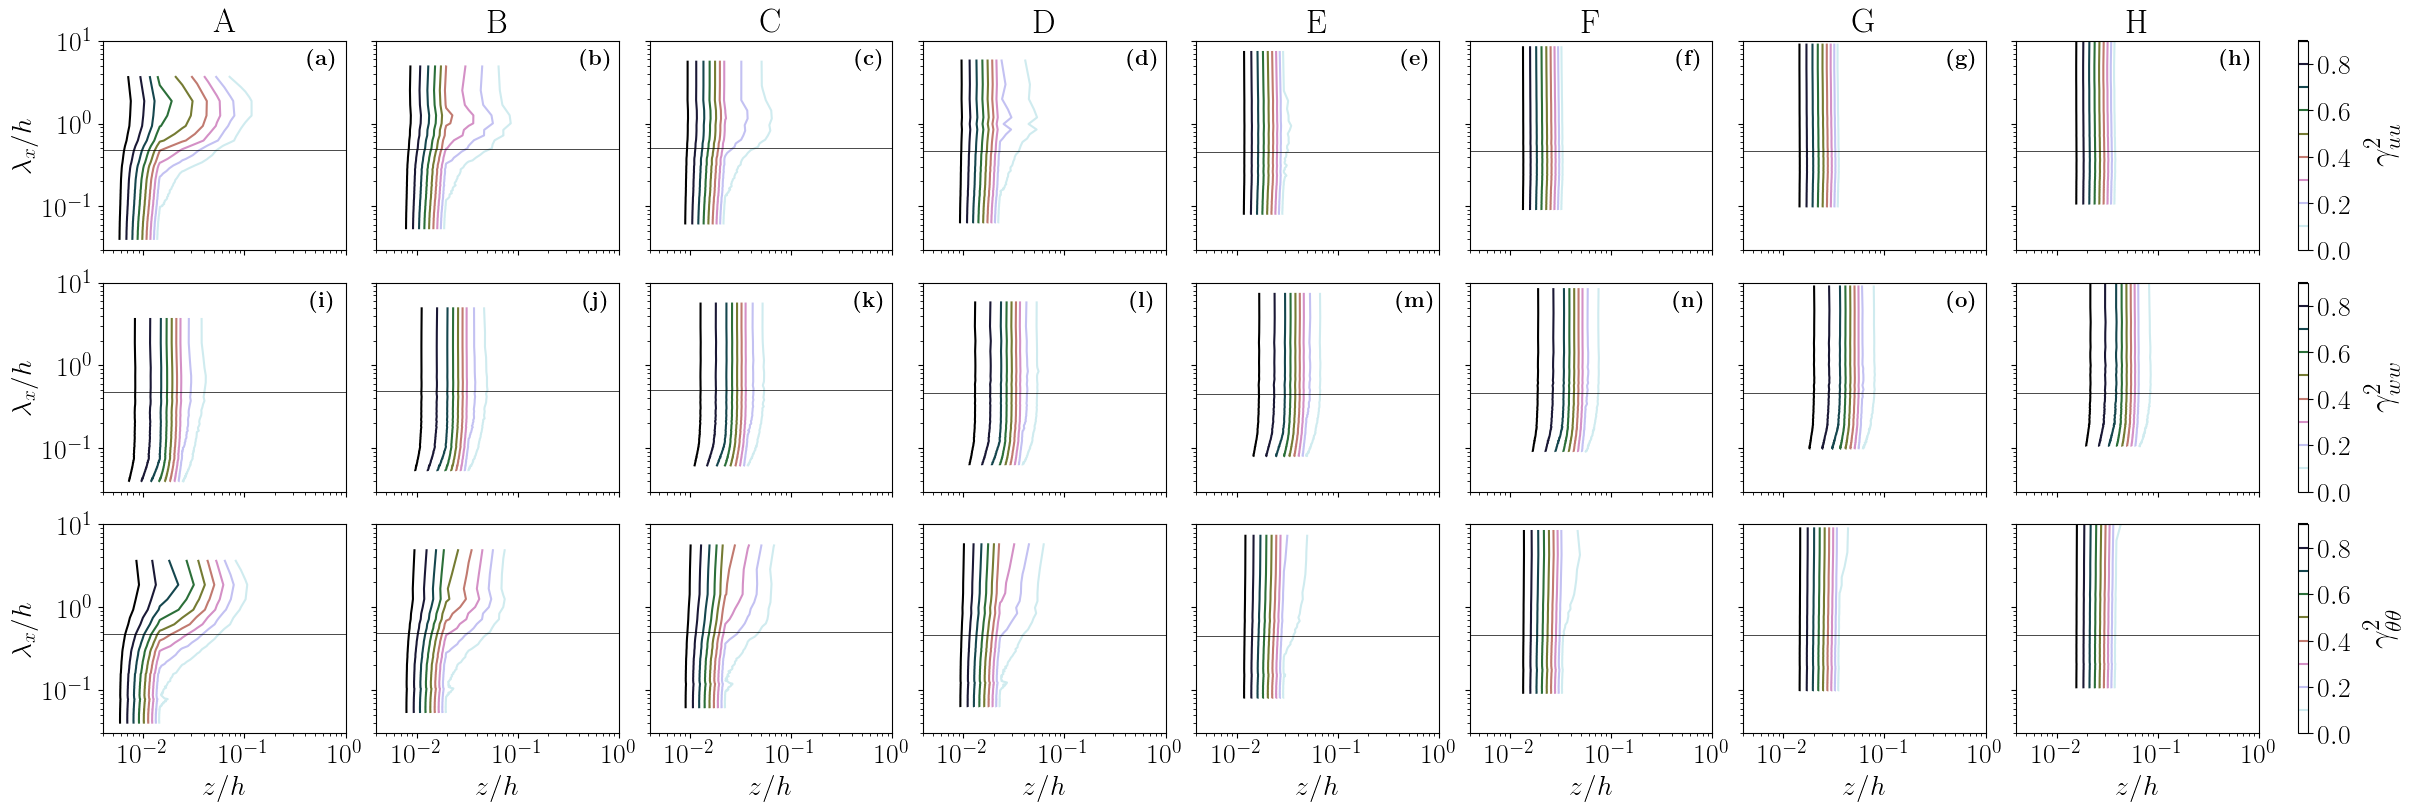

In [13]:
# plot all sims, 1 per column
fig3, ax3 = plt.subplots(nrows=3, ncols=nsim, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(3*nsim, 8))
levelG = np.linspace(0, 0.9, 10)
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # G2u
    cax3u = ax3[0,ii].contour(g.z/s.h, 1./g.freq_x/s.h, g.u0, cmap=cmap3, levels=levelG)
    # G2w
    cax3w = ax3[1,ii].contour(g.z/s.h, 1./g.freq_x/s.h, g.w0, cmap=cmap3, levels=levelG)
    # G2t
    cax3t = ax3[2,ii].contour(g.z/s.h, 1./g.freq_x/s.h, g.theta0, cmap=cmap3, levels=levelG)
    # dashed vert line for L/h
    # [iax.axvline(s.L/s.h, color="k", lw=0.5) for iax in ax3[:,ii]]
    # dashed horiz line for zj/2
    [iax.axhline(s.zj/2/s.h, color="k", lw=0.5) for iax in ax3[:,ii]]
    # title columns
    ax3[0,ii].set_title(s.lab)
# colorbars
cb3u = fig3.colorbar(cax3u, ax=ax3[0,:], location="right", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb3w = fig3.colorbar(cax3w, ax=ax3[1,:], location="right", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb3t = fig3.colorbar(cax3t, ax=ax3[2,:], location="right", 
                     ticks=MultipleLocator(0.2), pad=0.01)
# cb labels
cb3u.ax.set_ylabel("$\\gamma_{uu}^2$", fontsize=24, labelpad=10, fontweight="bold")
cb3w.ax.set_ylabel("$\\gamma_{ww}^2$", fontsize=24, labelpad=10, fontweight="bold")
cb3t.ax.set_ylabel("$\\gamma_{\\theta \\theta}^2$", fontsize=24, labelpad=10, fontweight="bold")
# make axes log-log
ax3[0,0].set_xscale("log")
ax3[0,0].set_yscale("log")
# axis limits
ax3[0,0].set_ylim([3e-2, 1e1])
ax3[0,0].set_xlim([4e-3, 1e0])
# axis labels
[iax.set_xlabel("$z/h$") for iax in ax3[-1,:]]
[iax.set_ylabel("$\\lambda_x / h$") for iax in ax3[:,0]]
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("p"))]
for iax, lab in zip(ax3.flatten(), labels):
    iax.text(0.6, 6, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, ha="center", va="center")
# save figure
fsave = f"{figdir}Fig05.pdf"
# fig3.savefig(fsave, format="pdf")

## Figure 6: LCS at same height

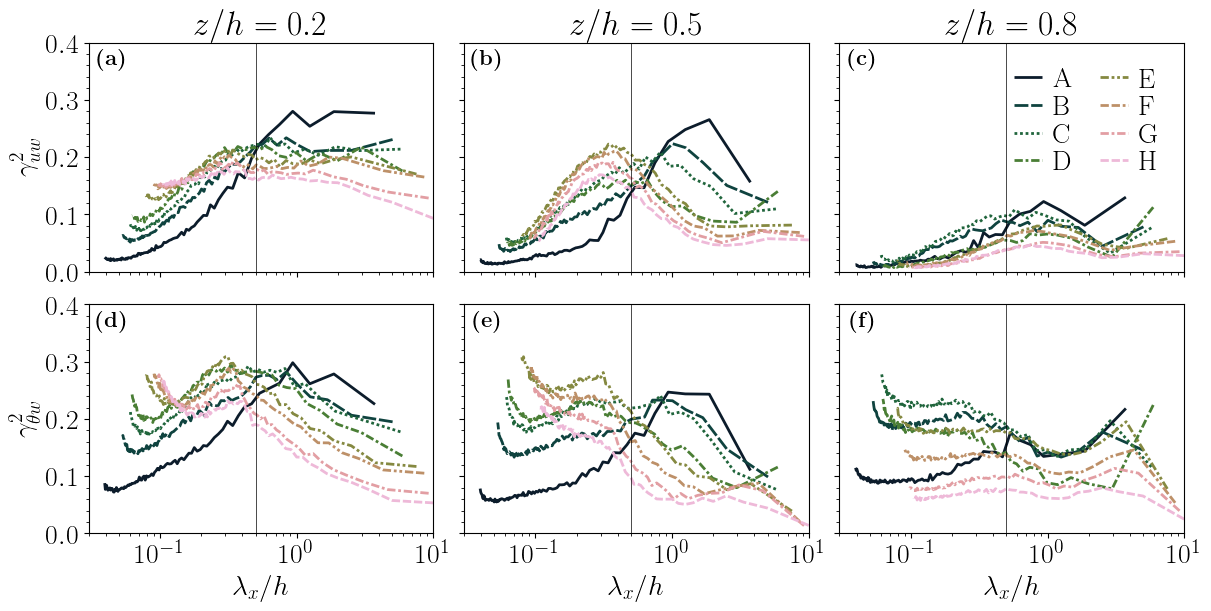

In [14]:
# plot uw and tw separately (rows), all stabilities for given height (col)
# row 1: uw
# row 2: tw
# col 1: z/h = 0.1
# col 2: z/h = 0.5
# col 3: z/h = 1.0
fig3, ax3 = plt.subplots(nrows=2, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(12, 6))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # row 1
    zh = g.z / s.h
    jz1 = abs(zh - 0.2).argmin()
    jz2 = abs(zh - 0.5).argmin()
    jz3 = abs(zh - 0.8).argmin()
    # plot
    ax3[0,0].plot(1./g.freq_x/s.h, g.uw.isel(z=jz1), label=s.lab, c=cmap[ii], ls=dash[ii], lw=2)
    ax3[0,1].plot(1./g.freq_x/s.h, g.uw.isel(z=jz2), label=s.lab, c=cmap[ii], ls=dash[ii], lw=2)
    ax3[0,2].plot(1./g.freq_x/s.h, g.uw.isel(z=jz3), label=s.lab, c=cmap[ii], ls=dash[ii], lw=2)
    # row 2
    ax3[1,0].plot(1./g.freq_x/s.h, g.tw.isel(z=jz1), label=s.lab, c=cmap[ii], ls=dash[ii], lw=2)
    ax3[1,1].plot(1./g.freq_x/s.h, g.tw.isel(z=jz2), label=s.lab, c=cmap[ii], ls=dash[ii], lw=2)
    ax3[1,2].plot(1./g.freq_x/s.h, g.tw.isel(z=jz3), label=s.lab, c=cmap[ii], ls=dash[ii], lw=2)
# label columns
for iax, zz in zip(ax3[0,:], [0.2, 0.5, 0.8]):
    iax.set_title(f"$z/h = {{{zz}}}$")
# vertical line on each for lambda_x/z_j = 1
for iax in ax3.flatten():
    iax.axvline(0.5, lw=0.5, c="k", ls="-")
# label axes
ax3[0,0].set_ylabel("$\\gamma^2_{uw}$")
ax3[1,0].set_ylabel("$\\gamma^2_{\\theta w}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / h$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
ax3[0,0].set_xlim([3e-2, 1e1])
ax3[0,0].set_ylim([0, 0.4])
# axis ticks
ax3[0,0].yaxis.set_major_locator(MultipleLocator(0.1))
ax3[0,0].yaxis.set_minor_locator(MultipleLocator(0.02))
# legend
ax3[0,2].legend(frameon=False, labelspacing=0.10, ncol=2, columnspacing=1,
                handletextpad=0.4, handlelength=1, loc="upper right")
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("g"))]
for iax, lab in zip(ax3.flatten(), labels):
    iax.text(0.045, 0.37, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, ha="center", va="center")
# save figure
fsave = f"{figdir}Fig06.pdf"
# fig3.savefig(fsave, format="pdf")

## Figure 7: Transport efficiency profiles

$\eta_{uw}$, $\eta_{\theta w}$, ratio

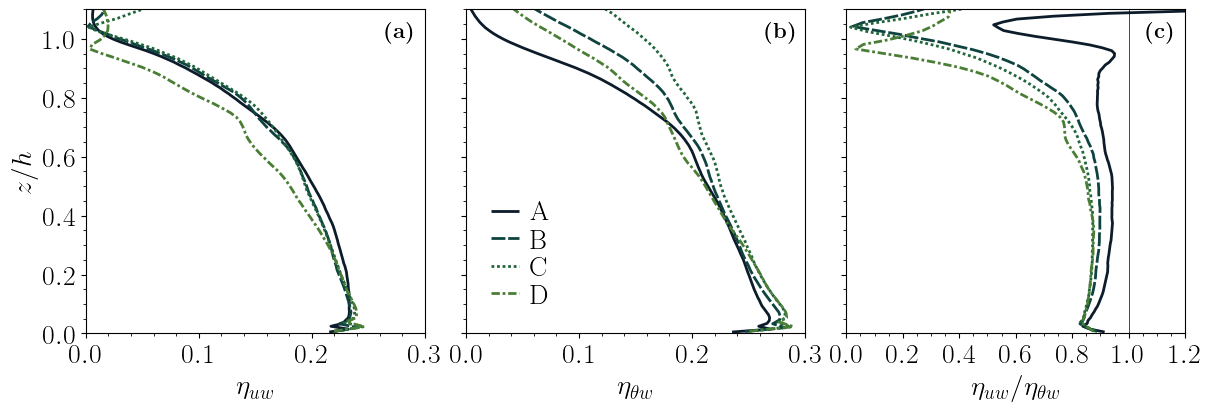

In [18]:
fig4, ax4 = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4), constrained_layout=True)
for ii, (s, q) in enumerate(zip(sall[:4], quadall[:4])):
    # eta_uw
    ax4[0].plot(q.eta_uw, q.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # eta_tw
    ax4[1].plot(q.eta_tw, q.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # eta_uw/eta_tw
    ax4[2].plot(q.eta_uw/q.eta_tw, q.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
# vertical line for ratio = 1
ax4[2].axvline(1, lw=0.5, c="k")
# legend
ax4[1].legend(frameon=False, labelspacing=0.10,# ncol=2, columnspacing=1,
                handletextpad=0.4, handlelength=1, loc="lower left")
# x axis limits
ax4[0].set_xlim([0, 0.3])
ax4[1].set_xlim([0, 0.3])
ax4[2].set_xlim([0, 1.2])
# x axis ticks
ax4[0].xaxis.set_major_locator(MultipleLocator(0.1))
ax4[0].xaxis.set_minor_locator(MultipleLocator(0.02))
ax4[1].xaxis.set_major_locator(MultipleLocator(0.1))
ax4[1].xaxis.set_minor_locator(MultipleLocator(0.02))
ax4[2].xaxis.set_major_locator(MultipleLocator(0.2))
ax4[2].xaxis.set_minor_locator(MultipleLocator(0.05))
# y axis limits
ax4[0].set_ylim([0, 1.1])
# y axis ticks
ax4[0].yaxis.set_major_locator(MultipleLocator(0.2))
ax4[0].yaxis.set_minor_locator(MultipleLocator(0.05))
# axis labels
ax4[0].set_ylabel("$z/h$")
ax4[0].set_xlabel("$\\eta_{uw}$")
ax4[1].set_xlabel("$\\eta_{\\theta w}$")
ax4[2].set_xlabel("$\\eta_{uw} / \\eta_{\\theta w}$")
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("d"))]
for iax, lab in zip(ax4.flatten(), labels):
    iax.text(0.93, 0.93, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, ha="center", va="center", transform=iax.transAxes)
# save figure
fsave = f"{figdir}Fig07.pdf"
# fig4.savefig(fsave, format="pdf")

## Figure 8: Quadrant fraction profiles

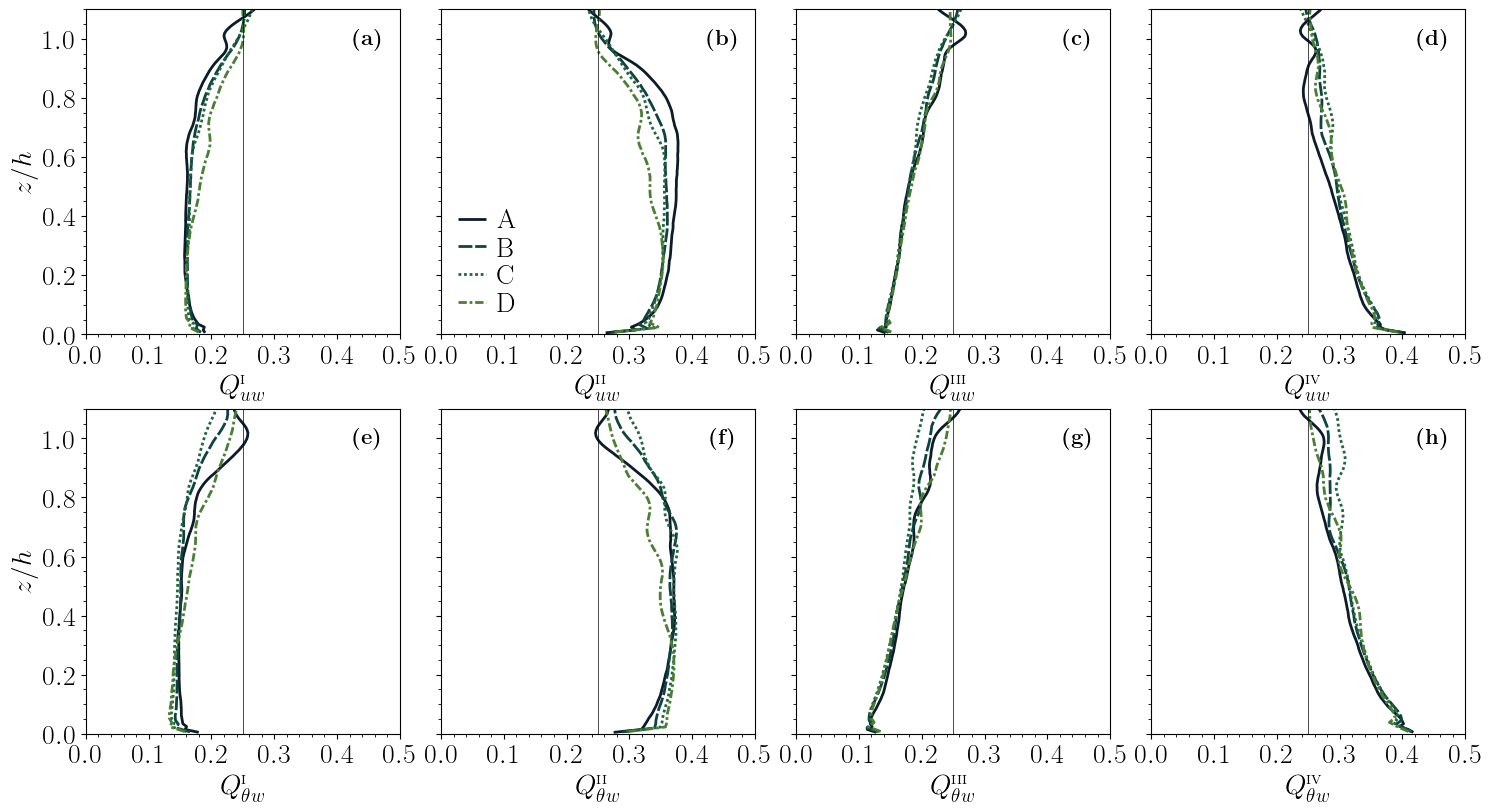

In [20]:
fig5, ax5 = plt.subplots(nrows=2, ncols=4, sharey=True, sharex="row", figsize=(14.8, 8), constrained_layout=True)
# loop over simulations
for ii, (s, quad) in enumerate(zip(sall[:4], quadall[:4])):
    # row 1: u'w'
    # quadrant I: u+w+
    ax5[0,0].plot(np.abs(quad.uw_pp)/np.abs(quad.uw_sum), s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # quadrant II: u-w+
    ax5[0,1].plot(np.abs(quad.uw_np)/np.abs(quad.uw_sum), s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # quadrant III: u-w-
    ax5[0,2].plot(np.abs(quad.uw_nn)/np.abs(quad.uw_sum), s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # quadrant IV: u+w-
    ax5[0,3].plot(np.abs(quad.uw_pn)/np.abs(quad.uw_sum), s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # row 2: theta'w'
    # quadrant I: T+w+
    ax5[1,0].plot(np.abs(quad.tw_pp)/np.abs(quad.tw_sum), s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # quadrant II: T-w+
    ax5[1,1].plot(np.abs(quad.tw_np)/np.abs(quad.tw_sum), s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # quadrant III: T-w-
    ax5[1,2].plot(np.abs(quad.tw_nn)/np.abs(quad.tw_sum), s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
    # quadrant IV: T+w-
    ax5[1,3].plot(np.abs(quad.tw_pn)/np.abs(quad.tw_sum), s.z/s.h, ls=dash[ii], lw=2, c=cmap[ii], label=s.lab)
# legend
ax5[0,1].legend(frameon=False, labelspacing=0.10,# ncol=2, columnspacing=0.7,
                handletextpad=0.4, handlelength=1, loc=(0.02, 0.02))
# y axis limits
ax5[0,0].set_ylim([0., 1.1])
# y axis ticks
ax5[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax5[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
# y axis labels
for iax in ax5[:,0]:
    iax.set_ylabel("$z/h$")
# x axis limits
ax5[0,0].set_xlim([0, 0.5])
ax5[1,0].set_xlim([0, 0.5])
# x axis ticks
ax5[0,0].xaxis.set_major_locator(MultipleLocator(0.1))
ax5[0,0].xaxis.set_minor_locator(MultipleLocator(0.02))
ax5[1,0].xaxis.set_major_locator(MultipleLocator(0.1))
ax5[1,0].xaxis.set_minor_locator(MultipleLocator(0.02))
# x axis labels - hacky but works
qlab = ["\\normalsize"+f"\\hbox{{{ii}}}" for ii in ["I", "II", "III", "IV"]]
for iax, iq in zip(ax5[0,:], qlab):
    iax.set_xlabel(f"$Q^{{{iq}}}_{{uw}}$")
for iax, iq in zip(ax5[1,:], qlab):
    iax.set_xlabel(f"$Q^{{{iq}}}_{{\\theta w}}$")
# plot vertical reference lines and subplot labels
labels = [chr(i) for i in range(ord("a"),ord("i"))]
for iax, lab in zip(ax5.flatten(), labels):
    iax.axvline(0.25, color="k", lw=0.5)
    iax.text(0.45, 1.0, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, ha="center", va="center")
# save figure
fsave = f"{figdir}Fig08.pdf"
# fig5.savefig(fsave, format="pdf")

## Figure 9: AM Coefficients versus $z/h$

Saving figure /home/bgreene/SBL_LES/figures/quadrant/Fig09.pdf


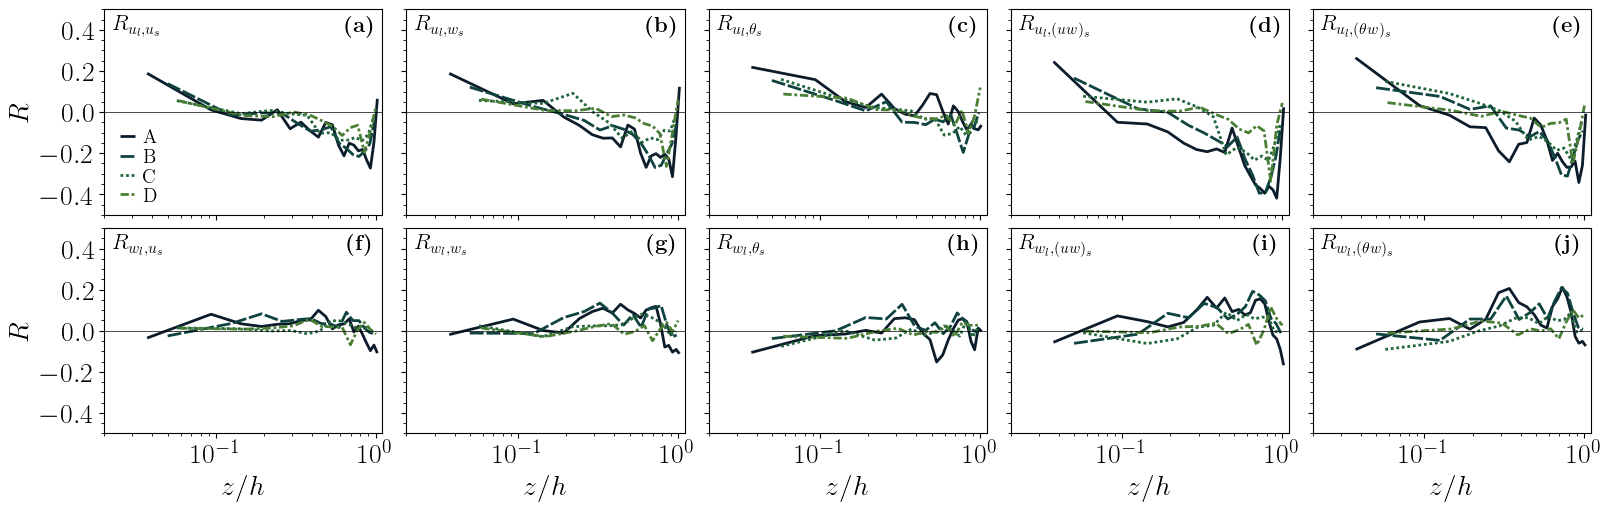

In [24]:
fig1, ax1 = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,
                         figsize=(16, 5), constrained_layout=True)
for isim, (R, stat) in enumerate(zip(Rall[:4], sall[:4])):
    # grab indices for sbl
    isbl = np.arange(stat.nzsbl, dtype=np.int32)
    # add z/h as coordinate and swap with z
    # define array of z/h
    # NOTE: using z/zj now, kept variable names for ease
    zh = R.z / stat.h
    # assign coupled with z
    R = R.assign_coords(zh=("z",zh.values))
    # swap
    R = R.swap_dims({"z": "zh"})
    # define number of points per bin
    Nperbin = 5
    # calculate total number of bins based on number of points
    Nbin = int(np.ceil(len(zh)/Nperbin))
    # define new zh bins based on averages of zh
    zhbin = []
    # loop through zh
    for jbin in range(Nbin):
        # define incrementing indices
        ilo = jbin * Nperbin
        ihi = ilo + Nperbin
        # check to see if ihi will be out of range
        if ihi >= len(zh):
            ihi = -1
        # grab zh data
        zhbin.append(gmean(zh[ilo:ihi]))
    # convert to numpy array
    zhbin = np.array(zhbin)
    # from this, also need len(zhbin)-1 with midpoints of bins for plotting
    zhnew = [] # define empty array
    for iz in range(Nbin-1):
        zhnew.append(gmean([zhbin[iz], zhbin[iz+1]]))
    zhnew = np.array(zhnew)
    # group by zh bins and calculate mean in one line
    Rbin = R.groupby_bins("zh", zhbin).mean("zh", skipna=True)
    # create new coordinate "zh_bins", then swap and drop
    Rbin = Rbin.assign_coords({"zh": ("zh_bins", zhnew)}).swap_dims({"zh_bins": "zh"})
    # interpolate empty values for better plotting
    Rbin = Rbin.interpolate_na(dim="zh")
    # calculate indeces of points where z/zj <= h/zj
    isblbin = np.where(zhnew <= (stat.h/stat.zj).values)[0]
    # Plot ------------------------------------------------
    # figure 1 - fifteen panels - modulation by u_l and w_l and t_l
    # row 1 - modulation by u_l
    # row 2 - modulation by t_l
    # col 1 - modulation of small-scale u by large-scale u&w&t
    # col 2 - modulation of small-scale w by large-scale u&w&t
    # col 3 - modulation of small-scale theta by large-scale u&w&t
    # col 4 - modulation of small-scale uw by large-scale u&w&t
    # col 5 - modulation of small-scale tw by large-scale u&w&t
    # (a) R_ul_Eu
    ax1[0,0].plot(Rbin.zh[isblbin], Rbin.ul_Eu[isblbin], ls=dash[isim], c=cmap[isim], lw=2,
                    label=stat.lab)
    # (b) R_tl_Eu
    ax1[1,0].plot(Rbin.zh[isblbin], Rbin.wl_Eu[isblbin], ls=dash[isim], c=cmap[isim], lw=2)
    # (c) R_ul_Ew
    ax1[0,1].plot(Rbin.zh[isblbin], Rbin.ul_Ew[isblbin], ls=dash[isim], c=cmap[isim], lw=2)
    # (d) R_tl_Ew
    ax1[1,1].plot(Rbin.zh[isblbin], Rbin.wl_Ew[isblbin], ls=dash[isim], c=cmap[isim], lw=2)
    # (e) R_ul_Et
    ax1[0,2].plot(Rbin.zh[isblbin], Rbin.ul_Et[isblbin], ls=dash[isim], c=cmap[isim], lw=2)
    # (f) R_tl_Et
    ax1[1,2].plot(Rbin.zh[isblbin], Rbin.wl_Et[isblbin], ls=dash[isim], c=cmap[isim], lw=2)
    # (g) R_ul_Euw
    ax1[0,3].plot(Rbin.zh[isblbin], Rbin.ul_Euw[isblbin], ls=dash[isim], c=cmap[isim], lw=2)
    # (h) R_tl_Euw
    ax1[1,3].plot(Rbin.zh[isblbin], Rbin.wl_Euw[isblbin], ls=dash[isim], c=cmap[isim], lw=2)
    # (i) R_ul_Etw
    ax1[0,4].plot(Rbin.zh[isblbin], Rbin.ul_Etw[isblbin], ls=dash[isim], c=cmap[isim], lw=2)
    # (j) R_tl_Etw
    ax1[1,4].plot(Rbin.zh[isblbin], Rbin.wl_Etw[isblbin], ls=dash[isim], c=cmap[isim], lw=2)

# OUTSIDE LOOP
# axis labels
for iax in ax1[1,:]:
    iax.set_xlabel("$z/h$")
for iax in ax1[:,0]:
    iax.set_ylabel("$R$")
# axis limits
ax1[0,0].set_xlim([2e-2, 1.1e0])
ax1[0,0].set_ylim([-0.5, 0.5])
# major and minor ticks
ax1[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax1[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
# axis scale
ax1[0,0].set_xscale("log")
# legend
ax1[0,0].legend(loc=(0.03, 0.01), labelspacing=0.10, 
                handletextpad=0.4, handlelength=0.75,
                fontsize=14, frameon=False)
# plot ref lines
for iax in ax1.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    # iax.axvline(0.5, c="k", ls="-", lw=0.5)
# text labels
ax1[0,0].text(0.03, 0.90, "$R_{u_l,u_s}$", fontsize=16, transform=ax1[0,0].transAxes)
ax1[1,0].text(0.03, 0.90, "$R_{w_l,u_s}$", fontsize=16, transform=ax1[1,0].transAxes)
ax1[0,1].text(0.03, 0.90, "$R_{u_l,w_s}$", fontsize=16, transform=ax1[0,1].transAxes)
ax1[1,1].text(0.03, 0.90, "$R_{w_l,w_s}$", fontsize=16, transform=ax1[1,1].transAxes)
ax1[0,2].text(0.03, 0.90, "$R_{u_l,\\theta_s}$", fontsize=16, transform=ax1[0,2].transAxes)
ax1[1,2].text(0.03, 0.90, "$R_{w_l,\\theta_s}$", fontsize=16, transform=ax1[1,2].transAxes)
ax1[0,3].text(0.03, 0.90, "$R_{u_l,(uw)_s}$", fontsize=16, transform=ax1[0,3].transAxes)
ax1[1,3].text(0.03, 0.90, "$R_{w_l,(uw)_s}$", fontsize=16, transform=ax1[1,3].transAxes)
ax1[0,4].text(0.03, 0.90, "$R_{u_l,(\\theta w)_s}$", fontsize=16, transform=ax1[0,4].transAxes)
ax1[1,4].text(0.03, 0.90, "$R_{w_l,(\\theta w)_s}$", fontsize=16, transform=ax1[1,4].transAxes)
# subplot labels
for iax, lab in zip(ax1.flatten(), list("abcdefghij")):
    iax.text(0.8, 0.42, f"$\\textbf{{({{{lab}}})}}$", fontsize=16, ha="center", va="center")

# save
fsave1 = f"{figdir}Fig09.pdf"
print(f"Saving figure {fsave1}")
# fig1.savefig(fsave1, format="pdf")

## Figure 10: Integrated AM coefficient bar graphs

In [28]:
# create static list of keys
keys = []
for key in list(Rall[0].keys()):
    if "_int" not in key:
        keys.append(key)

# loop over sims
for ii, (R, s) in enumerate(zip(Rall[:4], sall[:4])):
    # grab indices for sbl
    isbl = np.arange(s.nzsbl, dtype=np.int32)
    # loop over all variables
    for key in keys:
        # integrate each with height and divide by SBL depth
        R[f"{key}_int"] = R[key][isbl].integrate("z") / s.z[isbl][-1]

Saving figure /home/bgreene/SBL_LES/figures/quadrant/Fig10.pdf


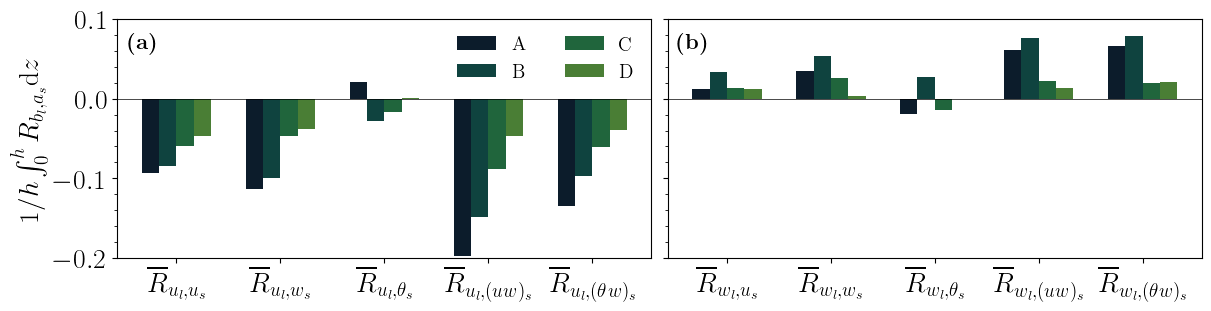

In [29]:
# plot subplots with bar plots
fig1, ax1 = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 3), constrained_layout=True)
# loop over sims
for ii, (R, s) in enumerate(zip(Rall[:4], sall[:4])):
    # u large
    ax1[0].bar(1+0.5*ii, R.ul_Eu_int, width=0.5, color=cmap[ii], label=s.lab)
    ax1[0].bar(4+0.5*ii, R.ul_Ew_int, width=0.5, color=cmap[ii])
    ax1[0].bar(7+0.5*ii, R.ul_Et_int, width=0.5, color=cmap[ii])
    ax1[0].bar(10+0.5*ii, R.ul_Euw_int, width=0.5, color=cmap[ii])  
    ax1[0].bar(13+0.5*ii, R.ul_Etw_int, width=0.5, color=cmap[ii])
    # w large
    ax1[1].bar(1+0.5*ii, R.wl_Eu_int, width=0.5, color=cmap[ii], label=s.lab)
    ax1[1].bar(4+0.5*ii, R.wl_Ew_int, width=0.5, color=cmap[ii])
    ax1[1].bar(7+0.5*ii, R.wl_Et_int, width=0.5, color=cmap[ii])
    ax1[1].bar(10+0.5*ii, R.wl_Euw_int, width=0.5, color=cmap[ii])  
    ax1[1].bar(13+0.5*ii, R.wl_Etw_int, width=0.5, color=cmap[ii])
    # theta large
    # ax1[1].bar(1+0.5*ii, R.tl_Eu_int, width=0.5, color=cmap1[ii], label=s.lab)
    # ax1[1].bar(4+0.5*ii, R.tl_Ew_int, width=0.5, color=cmap1[ii])
    # ax1[1].bar(7+0.5*ii, R.tl_Et_int, width=0.5, color=cmap1[ii])
    # ax1[1].bar(10+0.5*ii, R.tl_Euw_int, width=0.5, color=cmap1[ii])  
    # ax1[1].bar(13+0.5*ii, R.tl_Etw_int, width=0.5, color=cmap1[ii])

# tick labels
xplot = [j+(0.5*ii)/2 for j in np.arange(1,14,3)]
labelsu = ["$\\overline{R}_{u_l,u_s}$", "$\\overline{R}_{u_l,w_s}$", "$\\overline{R}_{u_l,\\theta_s}$", 
           "$\\overline{R}_{u_l,(uw)_s}$", "$\\overline{R}_{u_l,(\\theta w)_s}$"]
ax1[0].bar(xplot, 0, tick_label=labelsu)
labelsw = ["$\\overline{R}_{w_l,u_s}$", "$\\overline{R}_{w_l,w_s}$", "$\\overline{R}_{w_l,\\theta_s}$", 
           "$\\overline{R}_{w_l,(uw)_s}$", "$\\overline{R}_{w_l,(\\theta w)_s}$"]
ax1[1].bar(xplot, 0, tick_label=labelsw)
# labelst = ["$R_{\\theta_l,u_s}$", "$R_{\\theta_l,w_s}$", "$R_{\\theta_l,\\theta_s}$", "$R_{\\theta_l,(uw)_s}$", "$R_{\\theta_l,(\\theta w)_s}$"]
# ax1[1].bar(xplot, 0, tick_label=labelst)
# horizontal line on each subplot
for iax in ax1:
    iax.axhline(0, c="k", lw=0.5)
# axis limits
ax1[0].set_ylim([-0.2, 0.1])
# major and minor ticks
ax1[0].yaxis.set_major_locator(MultipleLocator(0.1))
ax1[0].yaxis.set_minor_locator(MultipleLocator(0.02))
# axis labels
ax1[0].set_ylabel("$1/h \\int_0^h R_{b_l,a_s} \\textnormal{d} z$")
# legend
ax1[0].legend(fontsize=14, frameon=False, ncol=2)
# subplot labels
for iax, lab in zip(ax1, list("ab")):
    iax.text(0.8, 0.07, f"$\\textbf{{({{{lab}}})}}$", fontsize=16, ha="center", va="center")
# save figure
fsave1 = f"{figdir}Fig10.pdf"
print(f"Saving figure {fsave1}")
# fig1.savefig(fsave1, format="pdf", bbox_inches="tight")

## Figure 11: AM coefficients versus $Ri_g$

In [39]:
nbin = 15
# define bin *edges*
Ribin = np.logspace(-2, -0.4, nbin)
# create dictionary of empty lists for each key in Rall
Rd = {}
for key in R.variables.keys():
    if ((key != "z") & ("_int" not in key)):
        Rd[key] = [[] for _ in range(nbin-1)]

# loop over simulations and fill Rd
for R, s in zip(Rall[:4], sall[:4]):
    # grab Ri values from s (only within sbl)
    isbl = np.arange(s.nzsbl, dtype=np.int32)
    Ri = s.Rig[isbl].values
    # loop over bins
    for ibin in range(1, nbin):
        jmean = np.where((Ri >= Ribin[ibin-1]) & (Ri < Ribin[ibin]))[0]
        # loop over variables and store in Rd
        for key in Rd.keys():
            Rd[key][ibin-1] += list(R[key][jmean].values)

# calculate bin centers for plotting
Riplot = []
for ibin in range(nbin-1):
    Riplot.append(gmean([Ribin[ibin], Ribin[ibin+1]]))
Riplot = np.array(Riplot)

# calculate mean, median, std of each bin for each param
Rplot = {}
for key in Rd.keys():
    # loop over bins with list comprehension (average each in list of lists)
    # mean
    Rplot[f"{key}_mean"] = np.array([np.mean(jbin) for jbin in Rd[key]])
    # median
    Rplot[f"{key}_med"] = np.array([np.median(jbin) for jbin in Rd[key]])
    # std
    Rplot[f"{key}_std"] = np.array([np.std(jbin) for jbin in Rd[key]])

Saving figure /home/bgreene/SBL_LES/figures/quadrant/Fig11.pdf


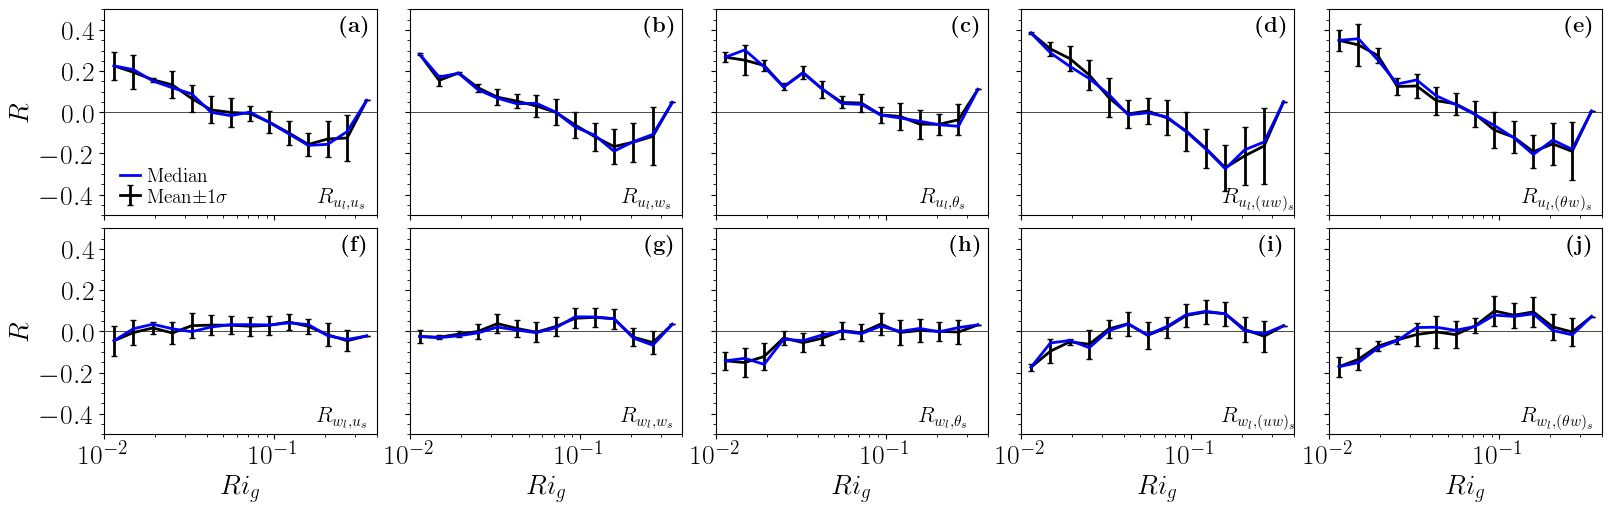

In [46]:
# now can plot using data from Rplot
fig2, ax2 = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,
                         figsize=(16, 5), constrained_layout=True)

# figure 1 - fifteen panels - modulation by u_l and t_l
# row 1 - modulation by u_l
# row 2 - modulation by t_l
# col 1 - modulation of small-scale u by large-scale u&w&t
# col 2 - modulation of small-scale w by large-scale u&w&t
# col 3 - modulation of small-scale theta by large-scale u&w&t
# col 4 - modulation of small-scale uw by large-scale u&w&t
# col 5 - modulation of small-scale tw by large-scale u&w&t
# plot mean and median as lines
# shade std around mean
# (a) R_ul_Eu
# ax2[0,0].plot(Riplot, Rplot["ul_Eu_mean"], ls="-", c="k", lw=2, label="Mean")
ax2[0,0].errorbar(Riplot, Rplot["ul_Eu_mean"], yerr=Rplot["ul_Eu_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,0].plot(Riplot, Rplot["ul_Eu_med"], ls="-", c="b", lw=2, label="Median", zorder=1000)

# (b) R_tl_Eu
# ax2[1,0].plot(Riplot, Rplot["tl_Eu_mean"], ls="-", c="k", lw=2)
ax2[1,0].errorbar(Riplot, Rplot["wl_Eu_mean"], yerr=Rplot["wl_Eu_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,0].plot(Riplot, Rplot["wl_Eu_med"], ls="-", c="b", lw=2, zorder=1000)

# (c) R_ul_Ew
# ax2[0,1].plot(Riplot, Rplot["ul_Ew_mean"], ls="-", c="k", lw=2)
ax2[0,1].errorbar(Riplot, Rplot["ul_Ew_mean"], yerr=Rplot["ul_Ew_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,1].plot(Riplot, Rplot["ul_Ew_med"], ls="-", c="b", lw=2, zorder=1000)

# (d) R_tl_Ew
# ax2[1,1].plot(Riplot, Rplot["tl_Ew_mean"], ls="-", c="k", lw=2)
ax2[1,1].errorbar(Riplot, Rplot["wl_Ew_mean"], yerr=Rplot["wl_Ew_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,1].plot(Riplot, Rplot["wl_Ew_med"], ls="-", c="b", lw=2, zorder=1000)

# (e) R_ul_Et
# ax2[0,2].plot(Riplot, Rplot["ul_Et_mean"], ls="-", c="k", lw=2)
ax2[0,2].errorbar(Riplot, Rplot["ul_Et_mean"], yerr=Rplot["ul_Et_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,2].plot(Riplot, Rplot["ul_Et_med"], ls="-", c="b", lw=2, zorder=1000)

# (f) R_tl_Et
# ax2[1,2].plot(Riplot, Rplot["tl_Et_mean"], ls="-", c="k", lw=2)
ax2[1,2].errorbar(Riplot, Rplot["wl_Et_mean"], yerr=Rplot["wl_Et_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,2].plot(Riplot, Rplot["wl_Et_med"], ls="-", c="b", lw=2, zorder=1000)

# (g) R_ul_Euw
# ax2[0,3].plot(Riplot, Rplot["ul_Euw_mean"], ls="-", c="k", lw=2)
ax2[0,3].errorbar(Riplot, Rplot["ul_Euw_mean"], yerr=Rplot["ul_Euw_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,3].plot(Riplot, Rplot["ul_Euw_med"], ls="-", c="b", lw=2, zorder=1000)

# (h) R_tl_Euw
# ax2[1,3].plot(Riplot, Rplot["tl_Euw_mean"], ls="-", c="k", lw=2)
ax2[1,3].errorbar(Riplot, Rplot["wl_Euw_mean"], yerr=Rplot["wl_Euw_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,3].plot(Riplot, Rplot["wl_Euw_med"], ls="-", c="b", lw=2, zorder=1000)

# (i) R_ul_Etw
# ax2[0,4].plot(Riplot, Rplot["ul_Etw_mean"], ls="-", c="k", lw=2)
ax2[0,4].errorbar(Riplot, Rplot["ul_Etw_mean"], yerr=Rplot["ul_Etw_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,4].plot(Riplot, Rplot["ul_Etw_med"], ls="-", c="b", lw=2, zorder=1000)

# (j) R_wl_Etw
# ax2[1,4].plot(Riplot, Rplot["tl_Etw_mean"], ls="-", c="k", lw=2)
ax2[1,4].errorbar(Riplot, Rplot["wl_Etw_mean"], yerr=Rplot["wl_Etw_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,4].plot(Riplot, Rplot["wl_Etw_med"], ls="-", c="b", lw=2, zorder=1000)

# axis labels
for iax in ax2[1,:]:
    iax.set_xlabel("$Ri_g$")
for iax in ax2[:,0]:
    iax.set_ylabel("$R$")
# axis limits
ax2[0,0].set_xlim([1e-2, 4e-1])
# ax2[0,0].set_xlim([0, 0.3])
ax2[0,0].set_ylim([-0.5, 0.5])
# major and minor ticks
ax2[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax2[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
# axis scale
ax2[0,0].set_xscale("log")
# legend
ax2[0,0].legend(loc=(0.03, 0.01), labelspacing=0.10, 
                handletextpad=0.4, handlelength=1,
                fontsize=14, frameon=False)
# plot ref lines
for iax in ax2.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    # iax.axvline(0.5, c="k", ls="-", lw=0.5)
# text labels
ax2[0,0].text(0.25, -0.42, "$R_{u_l,u_s}$", fontsize=16, ha="center", va="center")
ax2[1,0].text(0.25, -0.42, "$R_{w_l,u_s}$", fontsize=16, ha="center", va="center")
ax2[0,1].text(0.25, -0.42, "$R_{u_l,w_s}$", fontsize=16, ha="center", va="center")
ax2[1,1].text(0.25, -0.42, "$R_{w_l,w_s}$", fontsize=16, ha="center", va="center")
ax2[0,2].text(0.22, -0.42, "$R_{u_l,\\theta_s}$", fontsize=16, ha="center", va="center")
ax2[1,2].text(0.22, -0.42, "$R_{w_l,\\theta_s}$", fontsize=16, ha="center", va="center")
ax2[0,3].text(0.25, -0.42, "$R_{u_l,(uw)_s}$", fontsize=16, ha="center", va="center")
ax2[1,3].text(0.25, -0.42, "$R_{w_l,(uw)_s}$", fontsize=16, ha="center", va="center")
ax2[0,4].text(0.22, -0.42, "$R_{u_l,(\\theta w)_s}$", fontsize=16, ha="center", va="center")
ax2[1,4].text(0.22, -0.42, "$R_{w_l,(\\theta w)_s}$", fontsize=16, ha="center", va="center")
# subplot labels
for iax, lab in zip(ax2.flatten(), list("abcdefghij")):
    iax.text(0.3, 0.42, f"$\\textbf{{({{{lab}}})}}$", fontsize=16, ha="center", va="center")

# save
fsave2 = f"{figdir}Fig11.pdf"
print(f"Saving figure {fsave2}")
# fig2.savefig(fsave2, format="pdf")

## Figure 12: Conditionally averaged fields

Saving figure: /home/bgreene/SBL_LES/figures/quadrant/Fig12.png


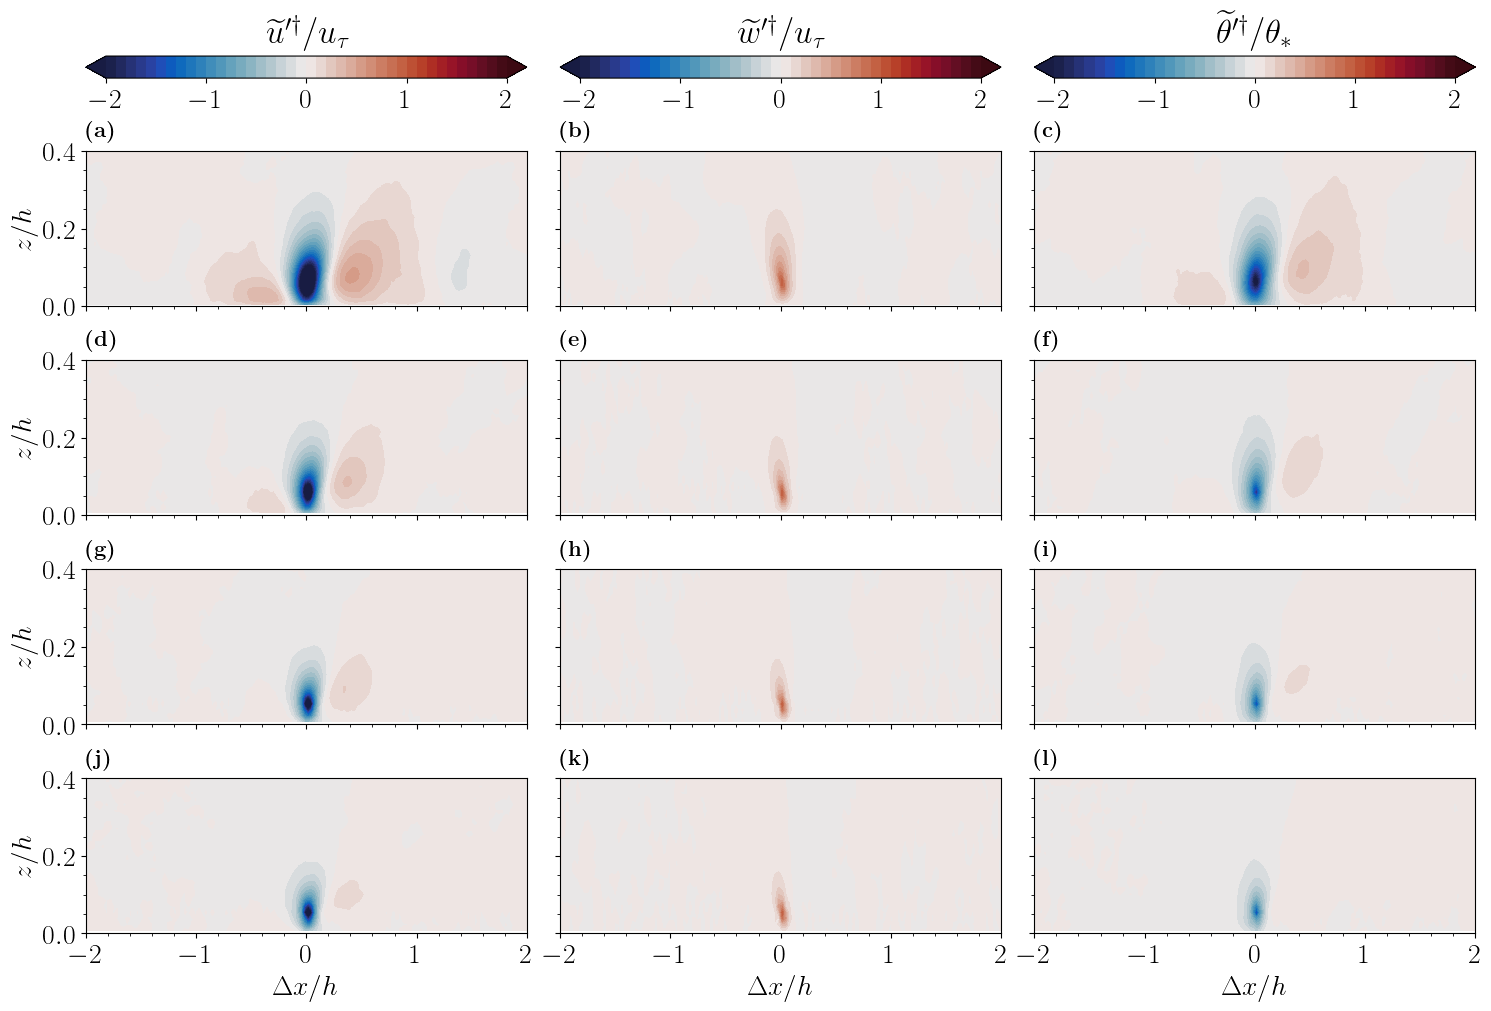

In [34]:
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, 
                       constrained_layout=True, figsize=(14.8, 2.5*4))
# 1 row per stability, 3 columns for u, w, theta
# define contour levels
levelu = np.linspace(-2, 2, 41)
levelw = np.linspace(-2, 2, 41)
levelt = np.linspace(-2, 2, 41)
# loop over stabilities
for ii, (s, c) in enumerate(zip(sall[:4], condall[:4])):
    # u
    cfu = ax[ii,0].contourf(c.x/s.h, c.z/s.h, c.u_cond_u_lo_1.T, 
                            extend="both", cmap=cmap2, levels=levelu)
    # w
    cfw = ax[ii,1].contourf(c.x/s.h, c.z/s.h, c.w_cond_u_lo_1.T, 
                            extend="both", cmap=cmap2, levels=levelw)
    # theta
    cft = ax[ii,2].contourf(c.x/s.h, c.z/s.h, c.T_cond_u_lo_1.T, 
                            extend="both", cmap=cmap2, levels=levelt)
# colorbars above each column
cbu = fig.colorbar(cfu, ax=ax[:,0], location="top",
                    ticks=[-2, -1, 0, 1, 2], pad=0.01)
cbw = fig.colorbar(cfw, ax=ax[:,1], location="top", 
                    ticks=[-2, -1, 0, 1, 2], pad=0.01)
cbt = fig.colorbar(cft, ax=ax[:,2], location="top", 
                    ticks=[-2, -1, 0, 1, 2], pad=0.01)
# cb ticks
cbu.ax.xaxis.set_ticks_position("bottom")
cbw.ax.xaxis.set_ticks_position("bottom")
cbt.ax.xaxis.set_ticks_position("bottom")
# cb labels
cbu.ax.set_xlabel("$\\widetilde{u}'^{\\dagger}/u_{\\tau}$", fontsize=24, labelpad=10, fontweight="bold")
cbw.ax.set_xlabel("$\\widetilde{w}'^{\\dagger}/u_{\\tau}$", fontsize=24, labelpad=10, fontweight="bold")
cbt.ax.set_xlabel("$\\widetilde{\\theta}'^{\\dagger}/\\theta_*$", fontsize=24, labelpad=10, fontweight="bold")
# axis limits
ax[0,0].set_ylim([0, 0.4])
ax[0,0].set_xlim([-2, 2])
# axis ticks
ax[0,0].xaxis.set_major_locator(MultipleLocator(1))
ax[0,0].xaxis.set_minor_locator(MultipleLocator(0.2))
ax[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
# axis labels
for iax in ax[:,0]:
    iax.set_ylabel("$z/h$")
for iax in ax[-1,:]:
    iax.set_xlabel("$\\Delta x / h$")
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("m"))]
for iax, lab in zip(ax.flatten(), labels):
    iax.text(-2, 0.45, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, ha="left", va="center")
# save figure
fsave = f"{figdir}Fig12.png"
print(f"Saving figure: {fsave}")
# fig.savefig(fsave, format="png", dpi=900)